# Handwriting Demo
---
## Imports

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

2023-04-24 13:24:17.899251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 13:24:17.930665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 13:24:17.931128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 13:24:18.547104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


---
## GPU and Versions

In [2]:
print("Num of GPUs available: " , len(tf.config.list_physical_devices('GPU')))

Num of GPUs available:  0


In [3]:
print("Tensorflow ver: " + tf.__version__)
print("numpy ver: " + np.__version__)
print("matplotlib ver: " + matplotlib.__version__)

Tensorflow ver: 2.12.0
numpy ver: 1.23.5
matplotlib ver: 3.7.1


---



## Read in data
### Describe
* x is the image
* y is the label

In [4]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

### What is its data typetype(train_x)

In [5]:
type(train_x)

numpy.ndarray

---
### What is the shape of the data

* `train_x` contains all 60000 of the 28x28 images
* `train_y` contains all 60000 classifications of those `train_x` images
* `test_x` contains all 10000 reserved 28x28 images for testing
* `test_y` contains all 10000 reserved classifications of those `test_x` images


In [6]:
print("train_x: " + str(train_x.shape))
print("train_y: " + str(train_y.shape))
print("test_x: " + str(test_x.shape))
print("test_y: " + str(test_y.shape))

train_x: (60000, 28, 28)
train_y: (60000,)
test_x: (10000, 28, 28)
test_y: (10000,)


---
## What does an image look like
* Data
* Display

### What do data look like for one image

In [7]:
#print(train_x[0])

### The classifications

In [8]:
for n in range(5):
    print("image " + str(n) + " is classified as a " + str(train_y[n]))

image 0 is classified as a 5
image 1 is classified as a 0
image 2 is classified as a 4
image 3 is classified as a 1
image 4 is classified as a 9


## prepare the data for training
need to convert data to the domain of 0 -> 1

In [9]:
train_x = train_x / 255
test_x = test_x /255

In [10]:
train_x[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Show a grid of images with label
### Function to graph it

In [11]:
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
  n_images = rows * cols
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()

## now set the parameters


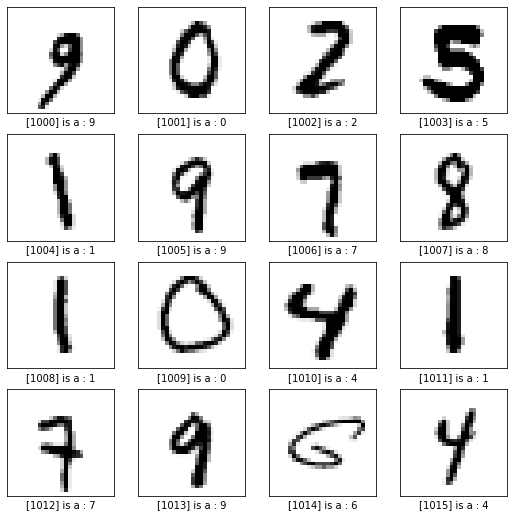

In [12]:
graphit(test_x,test_y, 4,4,1000, zoom=2.25)

## Can I get a model to work?
### Attempted model from 3blue1brown video

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

### Display model's architecture

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [20]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Train

In [23]:
history= model.fit(train_x,train_y, epochs=10, batch_size=128)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8694
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9445
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9566
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9638
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9704
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9719
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9755
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9766
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9782
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9806


## Look at history
### look like a dict

In [26]:
print(history.history)

{'loss': [0.4316103458404541, 0.18970249593257904, 0.14468896389007568, 0.11788170039653778, 0.09853879362344742, 0.09031638503074646, 0.07811711728572845, 0.07388682663440704, 0.06735177338123322, 0.060297150164842606], 'accuracy': [0.869350016117096, 0.9444833397865295, 0.9565500020980835, 0.9638000130653381, 0.9703666567802429, 0.971916675567627, 0.9755333065986633, 0.9766333103179932, 0.9781666398048401, 0.9805999994277954]}


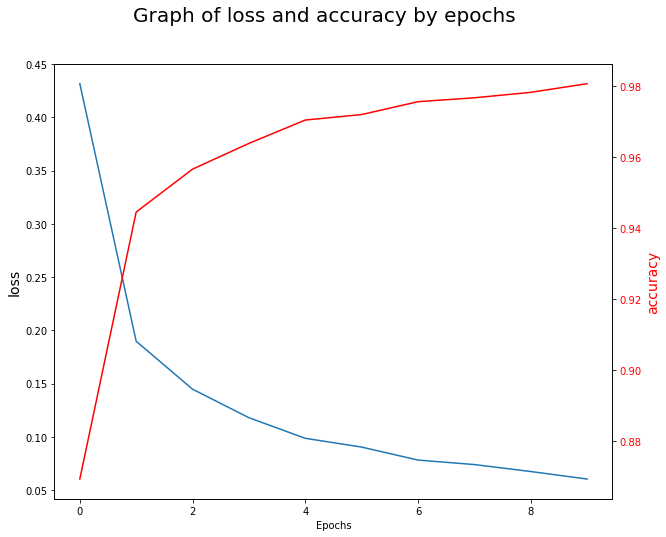

In [33]:
# list the number of epoch from the history object
x_values = np.arange(len(history.history['loss']))

fig, ax1 = plt.subplots(figsize=(10,8))
fig.suptitle("Graph of loss and accuracy by epochs", fontsize=20)

ax1.set_xlabel("Epochs")
ax1.set_ylabel('loss', color='black', fontsize =14)
plot_1 = ax1.plot(x_values,history.history['loss'], label="loss")
ax1.tick_params(axis = 'y', labelcolor = 'black')

# adding twin axes
ax2 = ax1.twinx()

ax2.set_ylabel('accuracy', color ='red',fontsize = 14)
plot_2 = ax2.plot(x_values,history.history['accuracy'], color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')


---
## Evaluate the model
### Test data that is still 28x28 images

In [35]:
test_loss,test_acc = model.evaluate(test_x,test_y,verbose = 1)
print('\nTest Accuracy:', test_acc *100, "%")

313/313 [==============================] - 0s 982us/step - loss: 0.0761 - accuracy: 0.9767

Test Accuracy: 97.67000079154968 %


---
## Predictions
### 28x28 images

In [36]:
prediction = model.predict(test_x[0:100])

4/4 [==============================] - 0s 1ms/step


### look at prediction 0

In [38]:
type(prediction[0])

numpy.ndarray

In [39]:
prediction[0]

array([1.1092184e-06, 2.7546218e-07, 3.5507768e-05, 1.0202873e-04,
       2.0488099e-10, 2.1181275e-05, 5.9258186e-13, 9.9983215e-01,
       1.2267155e-07, 7.7858194e-06], dtype=float32)

---
## Need a list of incorrect predictions
#### look thru the 100 predictions find where label is not the prediction

In [42]:
wrong = []
for i in range(len(prediction)):
    print(np.argmax(prediction[i]),test_y[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 4
7 7
2 2
7 7
1 1
2 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
1 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
6 6
0 0
4 4
1 1
9 9
5 5
7 7
8 8
9 9
3 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
9 9
1 1
7 7
3 3
2 2
9 9
7 7
7 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
9 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9


## The first 100 are correct
### so - we need to look more

In [43]:
all_predictions = model.predict(test_x)

313/313 [==============================] - 0s 713us/step


In [48]:
for i in range(len(all_predictions)):
    if np.argmax(all_predictions[i]) != test_y[i]:
        wrong.append(test_y[i])
    

In [51]:
print(wrong)
print(len(wrong))

[9, 4, 2, 9, 9, 4, 6, 2, 5, 3, 6, 4, 9, 2, 8, 4, 2, 8, 5, 9, 8, 9, 8, 9, 3, 5, 1, 6, 7, 6, 9, 4, 3, 6, 6, 7, 9, 4, 9, 7, 5, 8, 7, 7, 8, 5, 9, 7, 7, 8, 3, 4, 9, 9, 2, 3, 9, 8, 4, 7, 8, 9, 7, 9, 7, 4, 4, 7, 2, 3, 6, 5, 9, 4, 6, 9, 8, 9, 7, 0, 5, 9, 3, 9, 2, 6, 2, 4, 7, 9, 6, 0, 9, 5, 8, 9, 4, 8, 3, 9, 3, 6, 9, 9, 1, 5, 6, 7, 9, 6, 3, 5, 8, 9, 2, 5, 8, 7, 5, 4, 2, 6, 7, 0, 7, 6, 9, 5, 1, 4, 3, 7, 9, 0, 8, 9, 8, 2, 2, 9, 2, 4, 2, 9, 3, 5, 9, 9, 0, 8, 9, 6, 3, 7, 8, 9, 8, 3, 9, 4, 9, 0, 7, 8, 7, 1, 1, 3, 1, 4, 3, 8, 7, 4, 7, 4, 5, 3, 3, 3, 3, 3, 3, 9, 9, 9, 5, 9, 8, 0, 6, 9, 2, 7, 0, 9, 0, 9, 8, 1, 6, 0, 7, 8, 1, 1, 2, 2, 6, 0, 8, 8, 7, 7, 7, 7, 8, 9, 0, 9, 6, 9, 2, 5, 4, 5, 2, 5, 9, 2, 2, 3, 5]
233
